# Quiz 1 Study Notes for Heinz College 95-865 Unstructured Data Analysis

Notes written by Molly Tsai

All material is retrieved and adapted from http://www.andrew.cmu.edu/user/georgech/95-865/. The original author of the code is the instructor, George Chen. 

Reference at your own risk. 

This set of notes is dedicated to Reese, my guinea pig, who would probably ace the quiz if only she has opposable thumbs. 

# Read Files

## Multiple Files

In [1]:
def read_many_files(file_path):
    import glob 
    list_of_files = glob.glob(file_path) 
    list_of_text = list()
    for file in list_of_files:
        doc = open(file, encoding = 'utf8')
        for line in doc: 
            for word in line.split(): 
                list_of_text.append(word)
    return list_of_text

In [2]:
file_path = './HW1/HW1_Dataset/*.txt'
list_of_text = read_many_files(file_path)
list_of_text[:5]

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of']

# Single File

In [3]:
def read_one_file(file_path): 
    list_of_text = list()
    file = open(file_path, encoding ='utf8')
    for line in file: 
        list_of_text.append(line.strip())
    print(list_of_text[:8])
    print(len(list_of_text))
    return list_of_text

In [4]:
file_path = './Practice_Quiz/all_book_titles.txt'
list_of_titles = read_one_file(file_path)

["Scholars' Guide to Washington, D. C. for East Asian Studies China, Japan, Korea, and Mongolia", "Gardner's Art through the Ages: A Global History, Volume II (Book Only)", 'Criminology : The Core', 'Pharmacology for the Primary Care Provider', 'Calculus: Concepts and Contexts', 'Wars in the Woods The Rise of Ecological Forestry in America', 'Pharmacology for the Surgical Technologist', 'Essentials of Economics, 3rd Edition (The McGraw-Hill Series in Economics)']
2373


# Spacy

In [5]:
import spacy
nlp = spacy.load('en')  # load spaCy's built-in English models

## Parse Text and Create Count

### Some options when filtering text
To only include alphabetic letters:

- re.match ('[a-zA-Z]+$', token.lemma_)


To exclude stop words: 

- token._.is_stop

    OR 

- token.lemma in stopwords 

    where stopwords is a set of stop words 

To exclude punctuation 

- token.pos_ == 'PUNC' 

To exclude space

- token.pos_ == 'SPACE'

In [6]:
def parse_count(list_of_text):
    from collections import Counter
    import re 
    histogram = Counter() 
    for text in list_of_text: 
        parsed_text = nlp(text)
        for token in parsed_text:
            if re.match ('[a-zA-Z]+$', token.lemma_): #only alphabetic letters
                token_lemma = token.lemma_.lower()
                histogram[token_lemma] += 1
    return histogram

In [7]:
histogram=parse_count(list_of_titles)
for i, j in enumerate(histogram.items()): 
    if i>10 : 
        break 
    print(i, ': ', j)

0 :  ('scholar', 1)
1 :  ('guide', 58)
2 :  ('to', 326)
3 :  ('washington', 5)
4 :  ('for', 258)
5 :  ('east', 27)
6 :  ('asian', 25)
7 :  ('studies', 17)
8 :  ('china', 6)
9 :  ('japan', 3)
10 :  ('korea', 3)


### Usually we also sort this bad boy

In [8]:
def sort_counter(histogram, max_print): 
    from operator import itemgetter
    sorted_token_count_pairs = sorted(histogram.items(), reverse = True, key = itemgetter(1))
    i = 0 
    for token, count in sorted_token_count_pairs:
        i += 1
        if i>max_print: 
            break
        print(i, token, ":", count)
    return sorted_token_count_pairs

In [9]:
sorted_token_count_pairs = sort_counter(histogram, max_print=10)

1 and : 933
2 of : 576
3 the : 513
4 edition : 474
5 to : 326
6 a : 307
7 in : 307
8 for : 258
9 introduction : 242
10 with : 211


In [10]:
def make_histogram(parsed_text): 
    from collections import Counter
    histogram = Counter
    for token in parsed_text: 
        original_token_text = token.orth_ 
        histogram[original_token_text] += 1

# Counting Things

In [11]:
from collections import Counter

histogram = Counter()
parsed_text = nlp('Here are some words to demonstrate this thing. Thing Thing you')
for token in parsed_text:
    original_token_text = token.orth_
    histogram[original_token_text] += 1
    # note: a shorter way to write the line above is: histogram[original_token_text] += 1

# Apparently Counter automatically sorts by discending, but itemgetter seems useful
# same sorting code as lecture
from operator import itemgetter
sorted_token_count_pairs = sorted(histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in sorted_token_count_pairs:
    print(token, ":", count)

Thing : 2
Here : 1
are : 1
some : 1
words : 1
to : 1
demonstrate : 1
this : 1
thing : 1
. : 1
you : 1


## sklearn can count words, too
__Code from Lecture 8 demo__

In [61]:
vocab_size = 1000
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer does tokenization and can remove terms that occur too frequently, not frequently enough, or that are stop words

# document frequency (df) means number of documents a word appears in
tf_vectorizer = CountVectorizer(max_df=0.95,
                                min_df=2,
                                max_features=vocab_size,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(open(file_path, encoding ='utf8'))
print(tf_vectorizer.get_feature_names()[:10])
# Access counts:
# tf[0].toarray()
print(len(tf_vectorizer.get_feature_names()))
print(tf.shape)

['052', '100', '10th', '11', '11g', '11th', '12', '12th', '13th', '14e']
1000
(2373, 1000)


This means that tf has 2373 rows and 1000 features. Each element corresponding to a count associated with a document and a feature. 

# Plotting

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

## Barplot

In [13]:
def bar_plot(x_var, y_var):
    plt.bar(x_var, y_var)
    plt.xticks(rotation=45)
    plt.show

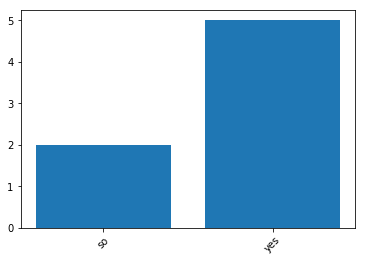

In [14]:
x_var = ['so', 'yes']
y_var = [2, 5]
bar_plot(x_var,y_var)

## Scatter Plot

In [15]:
def scatter_plot(x_var, y_var, labels):
    import numpy as np
    labels = np.array(labels)
    basic_plot = plt.scatter(x_var, y_var, c = labels, cmap = 'Spectral')
    legend_map = lambda i: plt.plot([], color=basic_plot.cmap(basic_plot.norm(i)), mec="none", 
                              label = format(i), ls="", marker="o")[0]
    handles = [legend_map(i) for i in np.unique(labels)]
    plt.legend(handles=handles, bbox_to_anchor = (1.04, 0.1), loc = "lower left", borderaxespad=0)
    plt.show

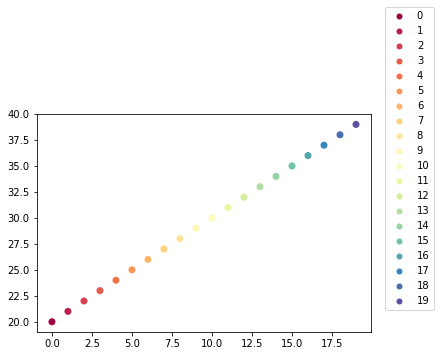

In [16]:
x=range(0,20)
y=range(20,40)
labels = range(0,20)
scatter_plot(x, y, labels)

# PCA

Rotate and squish 

When rotating, we are dealing with orthogonal matrices, which means we would need to use the inner product if doing so manually. This process is repeated until we achieve desired dimension. 


__We are drawing material from demo in Lecture 3 and Recitation 2__

In [17]:
# Loading some information 
import numpy as np

# grams per person per week
food_data = np.array([[105, 103, 103, 66],
                      [245, 227, 242, 267],
                      [685, 803, 750, 586],
                      [147, 160, 122, 93],
                      [193, 235, 184, 209], 
                      [156, 175, 147, 139],
                      [720, 874, 566, 1033],
                      [253, 265, 171, 143],
                      [488, 570, 418, 355],
                      [198, 203, 220, 187],
                      [360, 365, 337, 334],
                      [1102, 1137, 957, 674],
                      [1472, 1582, 1462, 1494],
                      [57, 73, 53, 47],
                      [1374, 1256, 1572, 1506],
                      [375, 475, 458, 135],
                      [54, 64, 62, 41]])
row_labels = ['Cheese',
              'Carcass meat',
              'Other meat',
              'Fish',
              'Fats and oils',
              'Sugars',
              'Fresh potatoes',
              'Fresh Veg',
              'Other Veg',
              'Processed potatoes',
              'Processed Veg',
              'Fresh fruit',
              'Cereals',
              'Beverages',
              'Soft drinks',
              'Alcoholic drinks',
              'Confectionary']
column_labels = ['England', 'Wales', 'Scotland', 'N Ireland']

## Using the sklearn PCA package

In [18]:
from sklearn.decomposition import PCA
def pca_fit_transform_dim_red(data_array,n_components): 
    reduced_pca = PCA(n_components = n_components) 
    reduced_pca_data = reduced_pca.fit_transform(data_array)
    return reduced_pca_data, reduced_pca

In [19]:
reduced_pca_food_data, reduced_pca = pca_fit_transform_dim_red(food_data.T,  1)

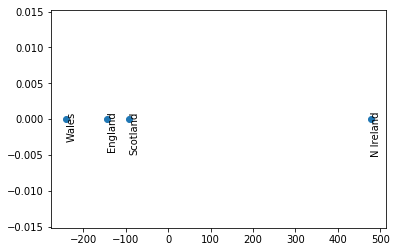

In [20]:
y_axis_all_zeros = np.zeros(len(reduced_pca_food_data))

plt.scatter(reduced_pca_food_data, y_axis_all_zeros)
for idx in range(len(reduced_pca_food_data)):
    plt.annotate(column_labels[idx], (reduced_pca_food_data[idx], y_axis_all_zeros[idx]), rotation=90)

In [21]:
# if we were to do this in 2d... 
reduced_2D_food_data, reduced_2D_pca = pca_fit_transform_dim_red(food_data.T, 2)

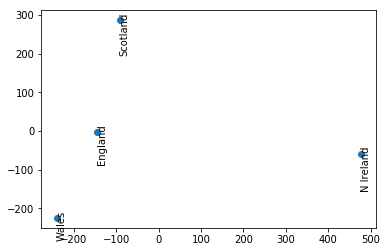

In [22]:
plt.scatter(reduced_2D_food_data[:,0],reduced_2D_food_data[:,1] )
for idx in range(len(reduced_2D_food_data)):
    plt.annotate(column_labels[idx], (reduced_pca_food_data[idx], reduced_2D_food_data[:,1][idx]), rotation=90)

## Code demonstrating how PCA works 

__This is from Recitation 2__

In [23]:
# The PCA object for n_components = 1 would contain some information that we get when we call PCA.fit

# The components represent the variation from the principal axes. 
# Basically, this is how far each point is away from the line that accounts for the most variability. 
# That green line in the slides. 

reduced_pca.components_

array([[-0.05695538,  0.04792763, -0.25891666, -0.08441498, -0.00519362,
        -0.03762098,  0.40140206, -0.15184994, -0.24359373, -0.02688623,
        -0.03648827, -0.6326409 , -0.04770286, -0.02618776,  0.23224414,
        -0.46396817, -0.0296502 ]])

In [24]:
# 1. Squish to the mean

reduced_pca_mean_diff= food_data[:,0]-reduced_pca.mean_
print(reduced_pca_mean_diff)

[ 10.75  -0.25 -21.    16.5  -12.25   1.75 -78.25  45.    30.25  -4.
  11.   134.5  -30.5   -0.5  -53.    14.25  -1.25]


In [25]:
#2. Find orthogonal/ rotate
np.inner(reduced_pca.components_[0], reduced_pca_mean_diff)


# Notice this value is the same value as the first transformed value 

-144.9931521820767

In [26]:
# Rinse and repeat 
for i in range(0, food_data.shape[1]):
    print(np.inner(reduced_pca.components_[0], food_data[:,i]-reduced_pca.mean_))

-144.9931521820767
-240.52914763517668
-91.86933899886353
477.3916388161169


In [27]:
reduced_pca_food_data

array([[-144.99315218],
       [-240.52914764],
       [ -91.869339  ],
       [ 477.39163882]])

# Manifold Learning 
Swiss rolling
- good for nonlinear dimensionality reduction 

We're going to be using Isomap

The concept: 
1. find nearest neighbor to build a road 
2. computer shortest distance but only allowed to be on road
3. unroll

__Code drawn from Lecture 4 demo__

In [28]:
# Get the goods in there
swiss_roll_2d = np.array([[479, -231], [515, -237],[551, -233],[581, -255],[597, -284],[610, -313],[619, -341],[623, -368],
                          [617, -407],[591, -434],[573, -468],[542, -478],[507, -490],[471, -482],[437, -462],[398, -446],
                          [383, -408],[403, -373],[430, -349],[470, -326],[507, -320],[531, -352],[527, -385],[487, -397]])

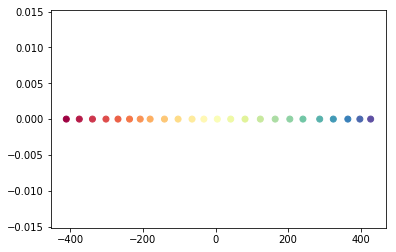

In [29]:
from sklearn.manifold import Isomap

# choose n_neighbors wisely 
isomap = Isomap(n_neighbors=2, n_components=1)
swiss_roll_1d_isomap = isomap.fit_transform(swiss_roll_2d)

# Just a plotting thing... 
def plot_1d(data_1d, y_offset=-0.001):
    plt.scatter(data_1d, np.zeros(len(data_1d)),
                c=list(range(len(data_1d))), cmap='Spectral')
plot_1d(swiss_roll_1d_isomap)

# Look. How unrolled

It's very important to choose the neighbors right. Otherwise, you unroll funny because you build weird roads.

# tSNE (t-distributed stochastic neighbor embedding)
Look, fancy tea leaves! 

Takeaway: 
- probabilistic determination for neighbors 
- improve low-dim representation to make low dimension probabilistic distribution to look like the original one 

I don't understand how this works exactly. 

Some knobs to turn: 
- perplexity value: low = emphasize local structure; high = emphasize global structure 
- generally, we initialize with PCA for tSNE
- learning rate: higher = more ball-like (I don't know how that works, though)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 24 samples in 0.021s...
[t-SNE] Computed neighbors for 24 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 23.784069
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.924458
[t-SNE] KL divergence after 1000 iterations: 0.463246


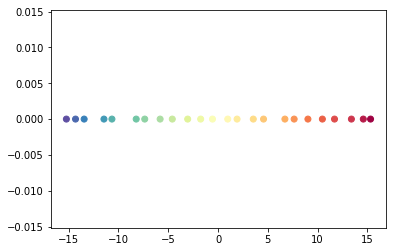

In [30]:
# Apply on Swissroll 

from sklearn.manifold import TSNE

# *WARNING*: *despite* what the sklearn documentation says for t-SNE, the perplexity parameter
# does matter! a helpful article to read: https://distill.pub/2016/misread-tsne/
tsne = TSNE(n_components=1, perplexity=2, learning_rate=.01, init='random', verbose=1, random_state=0)
swiss_roll_1d_tsne = tsne.fit_transform(swiss_roll_2d)
plot_1d(swiss_roll_1d_tsne)

## Dealing with Images
Flatten, tSNE, read the tea leaves

__Code from Lecture 5 demo__

In [31]:
def image_dim_red(images_data, n_components, verbose , perplexity, n_iter): 
    flattened_images = images_data.reshape(len(images), -1) # flatten this array to deal with easily
    feature_vectors = flattened_images.astype(np.float32)/255 # not sure what 255 is from. It makes sure values are between 0 to 1 
    np.random.seed(0)
    random_sample = np.random.permutation(len(flattened_images))[:1000]  # 1000 random indices
    from sklearn.manifold import TSNE
    # call the object 
    tsne = TSNE(n_components=n_components, verbose=verbose, perplexity=perplexity, n_iter=n_iter) # n_components=2 in class 
    # apply fit_transform 
    feature_vectors_tsne2d = tsne.fit_transform(feature_vectors[random_sample])
    labels = mnist.load_data()[0][1]
    plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1], c=labels[random_sample], cmap='Spectral')
    return feature_vectors_tsne2d, feature_vectors

#Note: we are taking out a random sample from image_data for training in this case. Also, faster. 

Using TensorFlow backend.


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.081s...
[t-SNE] Computed neighbors for 1000 samples in 4.610s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.865793
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.310684
[t-SNE] KL divergence after 4000 iterations: 0.925025
[5 0 4 ... 5 6 8]


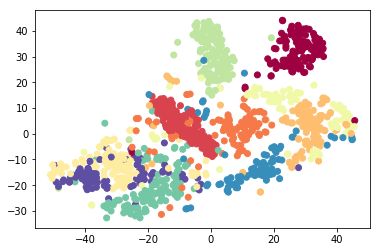

In [32]:
# Let's just get some data, like in the lecture
from keras.datasets import mnist

images = mnist.load_data()[0][0]

# We're going to get some random sample from this data

feature_vectors_tsne2d, feature_vectors=image_dim_red(images_data = images, n_components = 2, verbose=1, perplexity=40, n_iter=5000)



# Clustering
Two ways: Generative and hierarchical 
__Drawing from Lecture 05__ 

## Generative Models 
### k-means
1. Pick k, number of clusters
2. Guess where cluster centers are 
3. Assign each point to closest cluster
4. Update cluster mean
5. Repeat 3 and 4 until convergence 

Loop for many k values to find best k.
k-means is the most basic version of GMM, with nice round little mountains, so it freaks out when you have weird cluster shapes. 

### Gaussian Mixture Model
A more general k-means, with probability distributions. Each gaussian corresponds to different clusters. 

1. Flip biased k-sided coin
2. Let Z be the side that it lands on, with values 1,...k
3. Sample 1 point from Gaussian with characteristic mean and covariance

So... we learn what Gassian each point in our data is from, with some probability. We do this by continuously guessing where things should be until we figure it all out. 

__Code from Lecture 5 Demo__

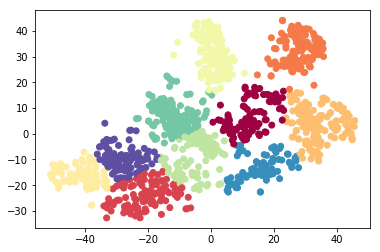

In [35]:
# JK this is getting really hard to actually run and summarize George's code now 

# Basically what George did was he reduced the dimensions using tSNE, and then ran everything through kmeans 

# But we can still run KMeans on other things... like the tSNE plot we just made that wouldn't finish running. 

from sklearn.cluster import KMeans 
kmeans = Kmeans = KMeans(n_clusters= 10, n_init=1000, random_state=0) 
# Remember we were playing with digits? There should be 10 clusters
# n_init = number of times algorithm will run with different centroid guesse

kmeans_cluster_assignments = kmeans.fit_predict(feature_vectors_tsne2d)

plt.scatter(feature_vectors_tsne2d[:,0], feature_vectors_tsne2d[:,1], c=kmeans_cluster_assignments, cmap = 'Spectral')

Some word of caution here.
You see those nice clusters? They don't really correspond to the digits because I didn't bother making the tSNE cluster right. But, hey, clusters! 

Now we move on to apply GMM to the same data to see how it clusters. 

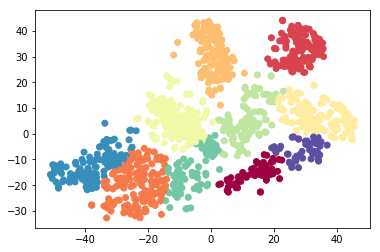

In [36]:
# Now what if we GMM this bad boy 

from sklearn.mixture import GaussianMixture

# GMM takes longer than k-means, so we make it have less guesses (n_init). Ain't nobody got all day
gmm = GaussianMixture(n_components=10, n_init=200, random_state=0) 
gmm_cluster_assignments = gmm.fit_predict(feature_vectors_tsne2d)

plt.scatter(feature_vectors_tsne2d[:,0], feature_vectors_tsne2d[:,1], c=gmm_cluster_assignments, cmap = 'Spectral')

Here, we observe GMM being more flexible and allowing non-round clusters to form compared to k-means. 

## What's the difference between fit, predict, and transform? 
So this is about when we get very confused to what is the difference between somealgorithm.fit, somealgorithm.predict, and somealgorithm.transform. 

Based on my limited observation, I think this is how it works: 
- fit: train the data. Its result is saved in the object.  
- predict: get a prediction or probability distribution of what the data looks like based on the fit. Its result is a numpy array. 
- transform: very similar to fit, but you're not making predictions, just changing the form of the data based on fit. Its result is a numpy array

It's really confusing, but keeping track of the dimensions of the array really helps. 

### Picking the best k
George seems to like this, but it's really simple. 
1. Choose scoring system to evaluate similarity/success of clustering
2. Give k a few values 
3. Run k-means, GMM, whatever and calculate that score. 
4. Save everything if your score is better than the last one! Save the score, the model, the cluster assignment  
5. Finish running and display results 

k = 9 has CH index 1363.0738747646042
k = 10 has CH index 1315.6105690943239
k = 11 has CH index 1284.787500107541
Best k within 2, 3, ..., 10 according to CH index: 9


(-55.82350313808756, 50.537534357569974, -36.56789552591757, 47.95596849344686)

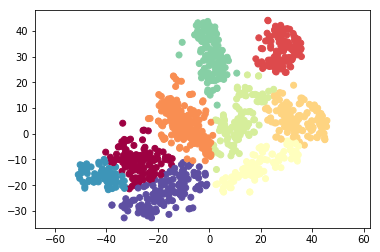

In [38]:
from sklearn.metrics import calinski_harabaz_score

best_score = -np.inf
best_k = None
best_model = None
best_cluster_assignments = None

for k in range(9, 12): # Ain't nobody got all day! 
    candidate_gmm = GaussianMixture(n_components=k, n_init=100, random_state=0)
    candidate_gmm.fit(feature_vectors_tsne2d)
    cluster_assignments = candidate_gmm.predict(feature_vectors_tsne2d)
    score = calinski_harabaz_score(feature_vectors_tsne2d, cluster_assignments)
    
    print('k =', k, 'has CH index', score)
    
    if score > best_score:
        best_score = score
        best_k = k
        best_model = candidate_gmm
        best_cluster_assignments = cluster_assignments
    
print('Best k within 2, 3, ..., 10 according to CH index:', best_k)

gmm_cluster_assignments = gmm.predict(feature_vectors_tsne2d)
plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1],
            c=best_cluster_assignments, cmap='Spectral')
plt.axis('equal')

Now, we can look at the original data to figure out what this all means. But I'm not going to. 

## Hierarchical clustering 
### Top-down: divisive clustering 
Start with everything in the same cluster and split split split until we're happy or each point is its own cluster (meaningless outcome). 

### Bottom-up: agglomerative clustering 
Every point is its own cluster. Merge the most similar two clusters until we're happy or we get one giant cluster with all the points (meaningless outcome). 
There's two ways we discussed to figure out closeness: 
- Centroid linkage: ignores # items in ea. cluster
- Single linkage: chaining behavior
- Complete linkage: crowding behavior 

In conclusion, hierarchical and generative clustering methods have their own uses. Essentially, generative clustering methods are useful for predictions while hiearchical ones are more unstable and are easy to work with. 

__Refer to not very fun code in Lecture 7 Demo__ 

# Topic Modeling
This has to do with famous Instagram people, right? 

## Latent Dirichlet Allocation 
Input: document-word matrix, specify k number of topics 

Output: the words that correspond to each of the topics... with some probability associated to it 

__Code from Lecture 8 demo__

In [63]:
num_topics = 10

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, learning_method='online', random_state=0)
lda.fit(tf) # we're learning the probabiltiy distribution of the doc-word matrix 
print('This matrix of size ', lda.components_.shape, ' contains the probability of each doc in a given topic')

This matrix of size  (10, 1000)  contains the probability of each doc in a given topic


In [64]:
topic_word_distributions = np.array([topic_word_pseudocounts / np.sum(topic_word_pseudocounts)
                                     for topic_word_pseudocounts in lda.components_]) 

# getting true distribution by normalizing

In [65]:
num_top_words = 20

print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
print()

for topic_idx in range(num_topics):
    print('[Topic ', topic_idx, ']', sep='')
    sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
    for rank in range(num_top_words):
        word_idx = sort_indices[rank]
        print(tf_vectorizer.get_feature_names()[word_idx], ':', topic_word_distributions[topic_idx, word_idx])
    print()

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
theory : 0.055624898581365115
mechanics : 0.05526658438720051
language : 0.046090971247451505
engineering : 0.04568527263767648
modern : 0.03312856743995319
physics : 0.03244977185679733
applications : 0.030326498672465035
quantum : 0.02843135058556697
thermodynamics : 0.027419892415195286
processing : 0.024994776473272473
game : 0.024278448605794083
reader : 0.02363573972926631
engineers : 0.023458149843635475
natural : 0.02338061922193845
course : 0.020263965777605985
scientists : 0.016967952522829812
chemical : 0.014769129047565641
fluid : 0.014153142610933587
fundamentals : 0.013426300184949022
gender : 0.012209138181253158

[Topic 1]
world : 0.0639659929089903
chemistry : 0.05905693407214772
concepts : 0.03317544314778718
general : 0.03145610908844145
organic : 0.03021896621702194
medicine : 0.023752028413068192
sex : 0.02244366209533904
sciences : 0.022299949279403417
operating : 0.021580

Just go look at George's code for the rest of the info. 